In [1]:
pip install yfinance


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf

np.random.seed(42)

[*********************100%%**********************]  1 of 1 completed


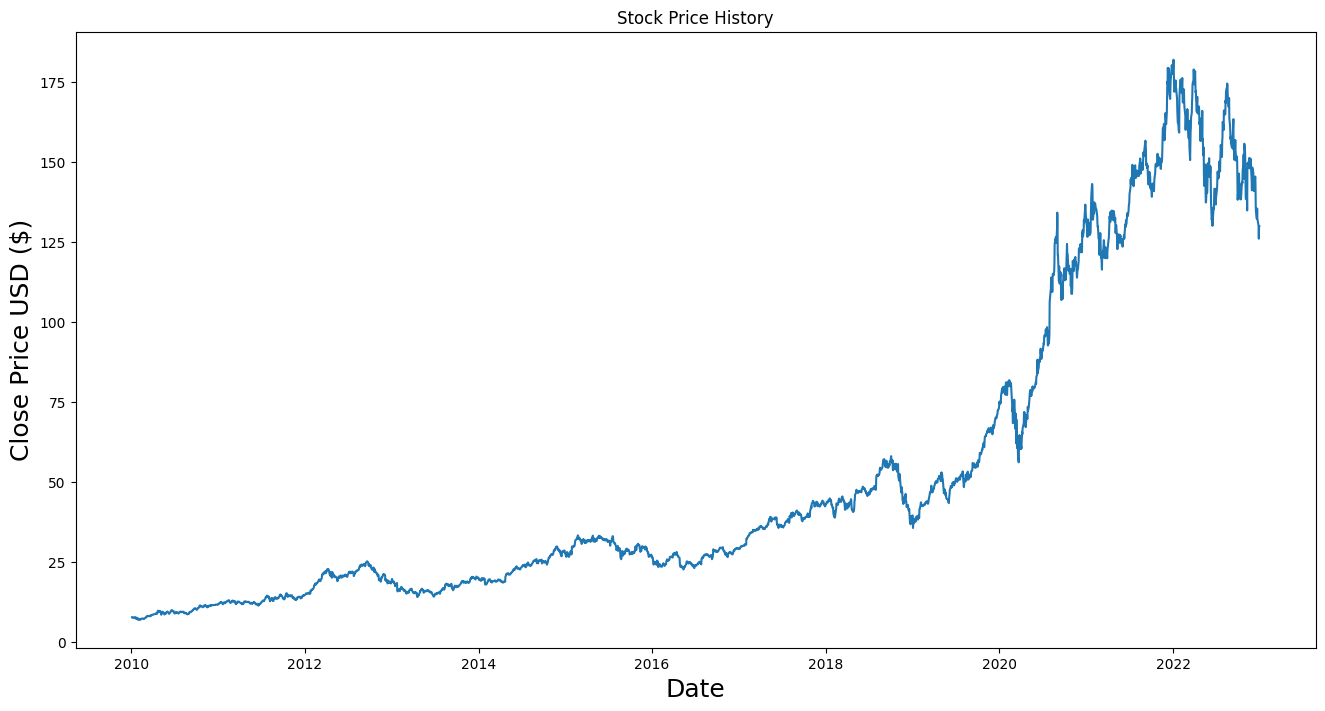

In [6]:
df = yf.download('AAPL', start='2010-01-01', end='2023-01-01')
df.head()

plt.figure(figsize=(16,8))
plt.title('Stock Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,51.297746,51.869747,50.731996,51.321186,49.065502,2.562707e+08
std,47.328490,47.938843,46.732224,47.357062,47.433208,2.225648e+08
min,6.870357,7.000000,6.794643,6.858929,5.798900,3.519590e+07
25%,18.966697,19.121697,18.780179,18.967589,16.490461,1.023541e+08
50%,29.756250,29.981250,29.561250,29.815000,27.162604,1.666698e+08
75%,56.983748,57.309999,56.469999,56.777499,54.504439,3.456643e+08
max,182.630005,182.940002,179.119995,182.009995,179.481110,1.880998e+09


In [15]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


train_data = scaled_data[0:int(training_data_len), :]

In [16]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


[array([4.47776362e-03, 4.55321042e-03, 3.85789270e-03, 3.77836496e-03,
       4.06383392e-03, 3.68253530e-03, 3.19519517e-03, 3.79263868e-03,
       3.54387631e-03, 2.83020666e-03, 4.68778577e-03, 4.01286179e-03,
       3.26656105e-03, 1.16225866e-03, 2.24703686e-03, 2.83224576e-03,
       3.22782354e-03, 1.47627233e-03, 2.03638039e-06, 5.46463221e-04,
       7.76876395e-04, 1.46403771e-03, 0.00000000e+00, 6.95312283e-04,
       4.22080672e-04, 8.44166789e-04, 6.25985509e-04, 1.34985068e-03,
       1.69853181e-03, 2.31432725e-03, 2.14100896e-03, 2.21848942e-03,
       1.96156791e-03, 1.70668550e-03, 1.02156329e-03, 1.75562669e-03,
       2.02885830e-03, 2.56308963e-03, 3.45416123e-03, 3.42561379e-03,
       3.52348256e-03, 3.80487330e-03, 5.48505863e-03, 5.51156697e-03,
       6.31495443e-03, 6.68606025e-03, 6.82063559e-03, 7.04493690e-03,
       6.48215813e-03, 6.60653796e-03, 6.53925029e-03, 6.64732002e-03,
       6.15794623e-03, 6.66771105e-03, 7.40380811e-03, 7.60975477e-03,
     

In [10]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)


3049/3049 [==============================] - 112s 35ms/step - loss: 9.4501e-04


In [11]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


6/6 [==============================] - 2s 42ms/step


In [12]:
predictions

array([[151.13963],
       [150.2535 ],
       [148.60893],
       [146.428  ],
       [144.754  ],
       [143.30508],
       [142.57378],
       [141.33202],
       [139.68295],
       [138.05913],
       [137.2284 ],
       [136.54411],
       [136.06659],
       [136.10199],
       [137.00787],
       [138.11127],
       [139.18214],
       [140.37842],
       [140.81963],
       [140.95915],
       [141.18814],
       [141.3244 ],
       [140.82175],
       [139.49641],
       [137.3714 ],
       [135.2181 ],
       [133.57593],
       [131.7794 ],
       [130.33415],
       [129.69331],
       [129.45209],
       [129.77895],
       [130.70784],
       [131.80916],
       [132.40317],
       [132.89279],
       [132.96388],
       [133.07259],
       [133.45125],
       [134.05307],
       [135.07005],
       [136.22842],
       [137.0809 ],
       [137.8046 ],
       [138.3209 ],
       [139.00221],
       [139.84706],
       [140.32362],
       [141.02434],
       [141.94058],


Root Mean Squared Error: 7.937559662820873


<ipython-input-13-463db12533ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


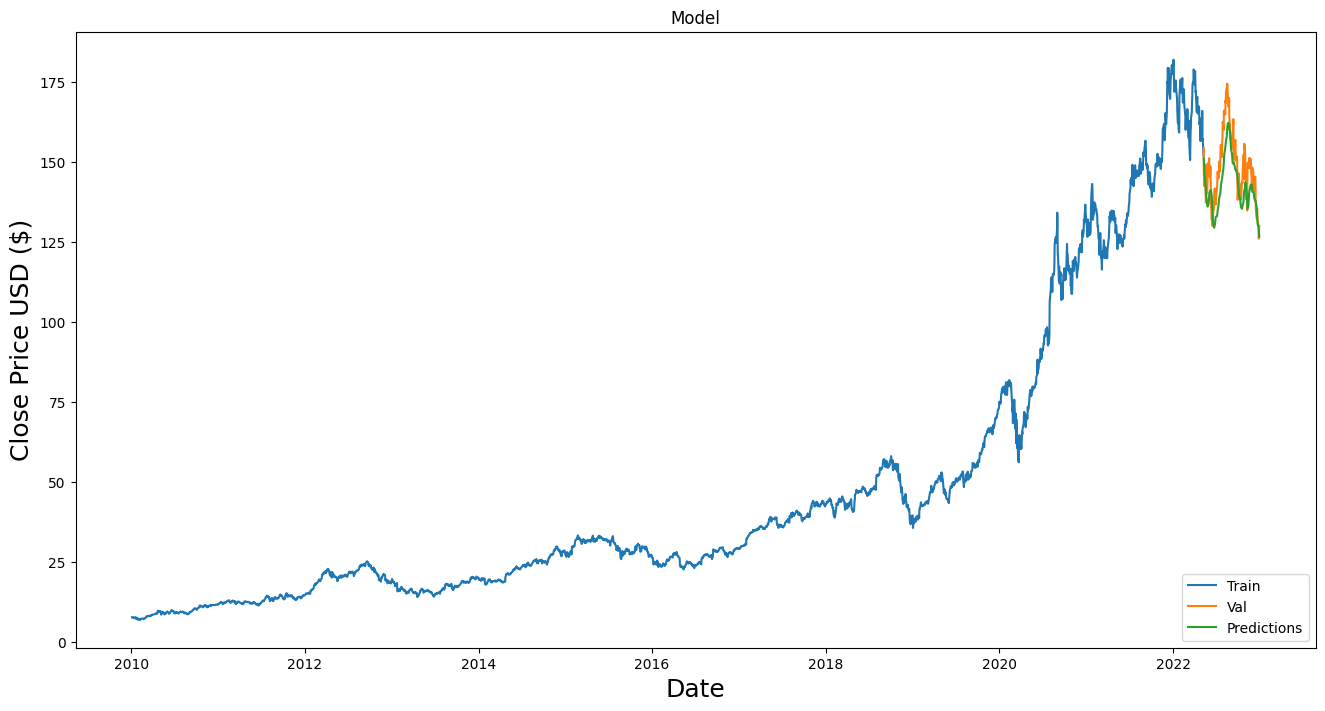

,Close,Predictions
Date,,
2022-05-10,154.509995,151.139633
2022-05-11,146.500000,150.253494
2022-05-12,142.559998,148.608932
2022-05-13,147.110001,146.427994
2022-05-16,145.539993,144.753998
...,...,...
2022-12-23,131.860001,130.607742
2022-12-27,130.029999,129.717468
2022-12-28,126.040001,128.789581


In [13]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'Root Mean Squared Error: {rmse}')

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

valid

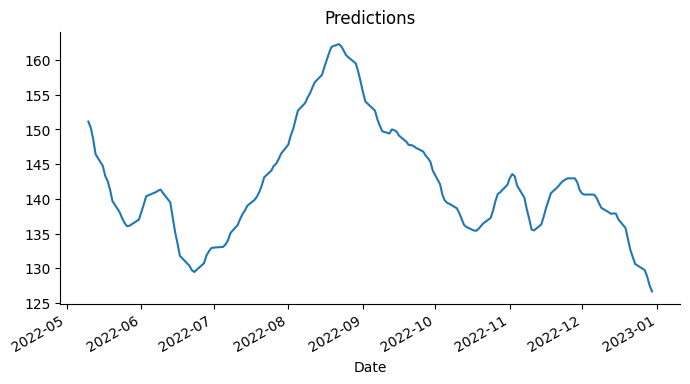

In [14]:
valid['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')

plt.gca().spines[['top', 'right']].set_visible(False)